In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## associated scripts and ncs

productivity_total.py
remineralization_total.py

PP_2015.nc
REM_2015.nc

#### load one day of productivity diagnostics

#### load productivity of the 3 classes - ppdiat, ppphy, ppmrub, which is hourly. average to daily?

In [8]:
PP = nc.Dataset('PP_2015.nc')['model_output']['year_prod']
REM = nc.Dataset('REM_2015.nc')['model_output']['year_remin']


<class 'netCDF4._netCDF4.Variable'>
float32 year_remin(days)
path = /model_output
unlimited dimensions: 
current shape = (365,)
filling on, default _FillValue of 9.969209968386869e+36 used



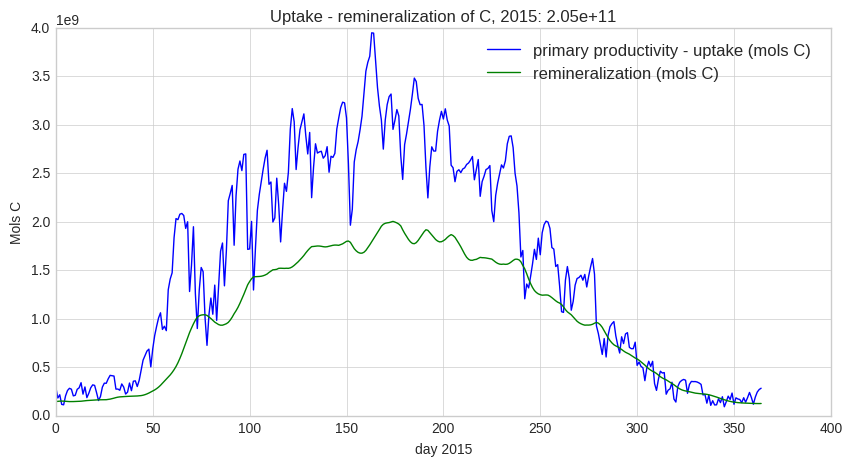

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(PP[:],label ='primary productivity - uptake (mols C) ')
ax.plot(REM[:], label ='remineralization (mols C)')
ax.set_xlabel('day 2015')
ax.set_ylabel('Mols C')
ax.legend()
ax.set_title('Uptake - remineralization of C, 2015: '+'{:.2e}'.format(np.sum(PP[:]-REM[:])))

In [45]:
print('total yearly remineralization back-of-env (this daily remin * 365)')
print('{:.2e}'.format(total_daily_remin*365))

total yearly remineralization back-of-env (this daily remin * 365)
3.71e+11


In [81]:
dian_test = nc.Dataset('/results/SalishSea/hindcast.201812/31oct15/SalishSea_1h_20151031_20151031_carp_T.nc')

In [82]:
print(dian_test)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1h_20151021_20151031
    description: auxilary variables
    title: auxilary variables
    Conventions: CF-1.6
    timeStamp: 2019-Jan-03 01:12:28 GMT
    uuid: ef6cb989-d29b-4459-8646-e67fbed5b67e
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(24)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 PAR(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 sigma_theta(time_counter,deptht,y,x), float32 e3t(time_counter,deptht,y,x), float32 dissolved_inorganic_carbon(time_counter,deptht,y,x), float3